In [1]:
# Nominal Variables

# Nominal variables are categorical variables without any intrinsic ordering. 
# The categories are just different labels with no meaningful order or ranking between them. Examples include:
# Gender: Male, Female, Other
# Color: Red, Blue, Green
# Type of Pet: Dog, Cat, Fish
# In nominal variables, you can only assess equality (e.g., is category A the same as category B?).


# Ordinal Variables
# Ordinal variables are categorical variables with a clear, meaningful order or ranking between the categories. 
# However, the intervals between the categories are not necessarily equal. Examples include:
# Education Level: High School, Bachelor's, Master's, Doctorate
# Rating Scale: Poor, Fair, Good, Very Good, Excellent
# Socioeconomic Status: Low, Middle, High
# In ordinal variables, you can assess both equality and order (e.g., is category A less than, equal to, 
# or greater than category B?), but you cannot make meaningful statements about the size of the intervals 
# between categories.

# Key Differences
# Order: Ordinal variables have a meaningful order, while nominal variables do not.
# Arithmetic Operations: You can perform rank-based statistics with ordinal variables, but you can only 
# check for equality with nominal variables.
# Interpretation: Ordinal variables provide more information about the relationship between categories 
# compared to nominal variables.

In [43]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
dummies = pd.get_dummies(df.town)

In [5]:
merged = pd.concat([df, dummies], axis='columns')

In [6]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [7]:
# Understanding the Dummy Variable Trap
# When converting a categorical variable with k categories into dummy variables, 
# k binary variables are created. Each dummy variable indicates the presence or absence
# of one of the categories. Including all k dummy variables in a regression model introduces 
# perfect multicollinearity because the sum of the dummy variables will always equal 1 
# (one of the categories must be present).

# Avoiding the Dummy Variable Trap
# To avoid the dummy variable trap, you should drop one of the dummy variables. 
# This dropped category serves as the reference category, against which the effects of the other categories are measured.

In [8]:
merged_final = merged.drop(columns=['town', 'west windsor'])
merged_final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [12]:
model = linear_model.LinearRegression()

In [13]:
# X: area, township, y: price
X = merged_final.drop(columns=['price'])

In [14]:
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [15]:
y = merged_final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [16]:
model.fit(X, y)

LinearRegression()

In [17]:
model.intercept_

249790.36766292533

In [18]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [20]:
# making predictions

model.predict(pd.DataFrame({
    'area': [2800],
    'monroe township': [1],
    'robinsville': [0]
}))

array([565089.22812299])

In [21]:
model.predict(pd.DataFrame({
    'area': [2800],
    'monroe township': [0],
    'robinsville': [1]
}))

array([590775.63964739])

In [22]:
model.predict(pd.DataFrame({
    'area': [3400],
    'monroe township': [0],
    'robinsville': [0]
}))

# in west windser

array([681241.66845839])

In [23]:
model.score(X, y)
# to determine accuracy

0.9573929037221873

In [24]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# using one hot encoding

In [26]:
le = LabelEncoder()

In [33]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [35]:
X = dfle[['town', 'area']].values
X 

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [39]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [47]:
# ohe = OneHotEncoder(categorical_features=[0])
# outdated

# Create the ColumnTransformer with OneHotEncoder for 'town' column
column_transformer = ColumnTransformer(
    transformers=[
        ('town', OneHotEncoder(), [0])
    ],
    remainder='passthrough'
)

# Fit and transform the feature matrix X
X = column_transformer.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [48]:
X = X[:,1:]
# take all the rows, and columns starting from one
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [49]:
model.fit(X, y)

LinearRegression()

In [52]:
model.predict([[1, 0, 2800]])
# 0 -> monrow toenship, 1 -> robinswille, 2 -> west windser, we have dropped monroe
# here we are checking for a house in robinsville with 2800 sqft

array([590775.63964739])

In [53]:
model.predict([[0, 1, 3400]])

array([681241.6684584])

# Exercise
## we have carprices.csv file, it has car sell prices for 3 diff models, first plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, answer the foll questions:
### 1) mercedez benz, 4 yrs old, 45000 mileage
### 2) bmw x5, 7 yrs old, 86000 mileage
### 3) find score of the model

In [56]:
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


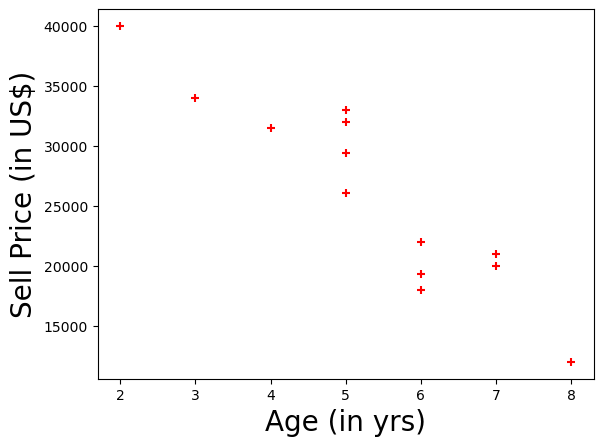

In [58]:
%matplotlib inline

plt.xlabel('Age (in yrs)', fontsize=20)
plt.ylabel('Sell Price (in US$)', fontsize=20)
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='red', marker='+')

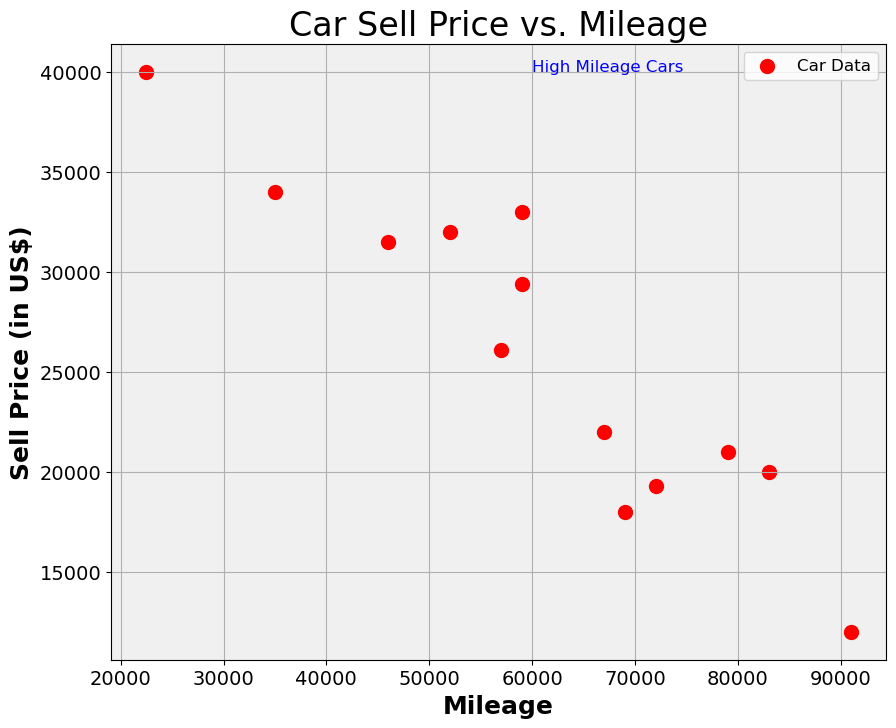

In [60]:
# %matplotlib inline

# plt.xlabel('Mileage', fontsize=20)
# plt.ylabel('Sell Price (in US$)', fontsize=20)
# plt.scatter(df['Mileage'], df['Sell Price($)'], color='red', marker='+')

plt.figure(figsize=(10, 8))
plt.scatter(df['Mileage'], df['Sell Price($)'], color='red', marker='o', s=100, label='Car Data')

plt.title('Car Sell Price vs. Mileage', fontsize=24)
plt.xlabel('Mileage', fontsize=18, fontweight='bold')
plt.ylabel('Sell Price (in US$)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize='large')
plt.gca().set_facecolor('#f0f0f0')  # Light gray background
plt.text(60000, 40000, 'High Mileage Cars', fontsize=12, color='blue')

plt.show()

In [61]:
# encoding

dummies = pd.get_dummies(df['Car Model'])
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [62]:
# drop Car model column and one of the dummy column to avoid dummy trap
final = merged.drop(columns=['Car Model', 'Audi A5'])
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [64]:
# create linear regresion model
model = linear_model.LinearRegression()

X = final.drop(columns=['Sell Price($)'])
y = final['Sell Price($)']

model.fit(X, y)

LinearRegression()

In [65]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -4.28466659e+03,  2.45354074e+03])

In [66]:
model.intercept_

56523.08523127495

In [67]:
model.predict(pd.DataFrame({
    'Mileage': [45000],
    'Age(yrs)': [4],
    'BMW X5': [0],
    'Mercedez Benz C class': [1]
}))

array([36991.31721061])

In [68]:
model.predict(pd.DataFrame({
    'Mileage': [86000],
    'Age(yrs)': [7],
    'BMW X5': [1],
    'Mercedez Benz C class': [0]
}))

array([11080.74313219])

In [69]:
model.score(X, y)

0.9417050937281082